In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from rlxutils import subplots
from itertools import product

sys.path.append("..")
from lib import io
from lib import sar
import torch

np.set_printoptions(edgeitems=4, linewidth=180)

from importlib import reload
reload(sar)

<module 'lib.sar' from '/home/alberto/github/sar-recovery/notebooks/../lib/sar.py'>

$$
C=
\begin{bmatrix}
\langle |S_{HH}|^2 \rangle & \sqrt{2} \langle S_{HH}S^{*}_{HV} \rangle &  \langle S_{HH}S^{*}_{VV}\rangle \\
\sqrt{2} \langle S_{HV}S^{*}_{HH} \rangle &  2 \langle |S_{HV}|^2 \rangle  & \sqrt{2} \langle S_{HV}S^{*}_{VV} \rangle \\
\langle S_{VV}S^{*}_{HH} \rangle & \sqrt{2} \langle S_{VV}S^{*}_{HV}\rangle & \langle |S_{VV}|^2 \rangle
\end{bmatrix}
$$

In [2]:
base_path = "/home/alberto/data/data/RST2/Barcelona"
date = '20100520'


## load scatter matrix from files


In [3]:
sm = io.load_bcn_scatter_matrix(base_path, date)
sm.shape

(4402, 1602, 2, 2)

## compute coherence matrix pixel wise with no averaging


In [4]:
cm = sar.compute_coherence_matrix(sm)
cm.shape

(4402, 1602, 3, 3)

## compute normalized coherence matrix from scatter matrix and window size 7

In [5]:
ncm1 = sar.compute_quadpol_normalized_coherence_matrix(sm, window_size=7)

## normalize pixel wise coherence matrix with window size 7

In [6]:
ncm2 = sar.normalize_quadpol_coherence_matrix(cm, window_size=7)

In [7]:
np.allclose(ncm1,  ncm2, atol=1e-5)

True

In [8]:
# 9 components: 

names = ["d1.real", "d2.real", "d3.real", "rho12.real", "rho12.imag", "rho13.real", "rho13.imag", "rho23.real", "rho23.imag"]
ncm2.shape

(628, 228, 9)

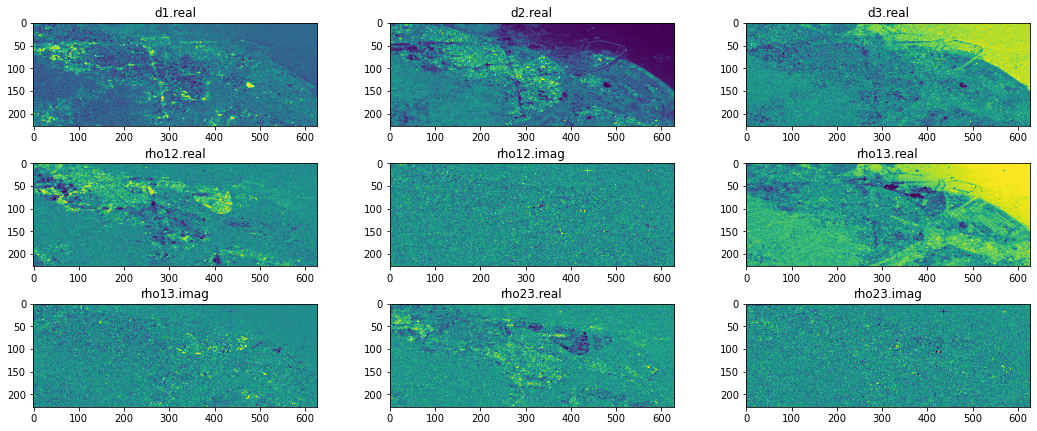

In [9]:
for ax,i in subplots(range(9), n_cols=3, usizex=5, usizey=2):
    x = ncm2[:,:,i]
    vmin, vmax = np.percentile(x, [1,99])
    plt.imshow(x.T, vmin=vmin, vmax=vmax)
    plt.title(names[i])

## check with small sample data

In [10]:
_cm = np.random.randint(10, size=(4,4,3,3)) + 1j * np.random.randint(10, size=(4,4,3,3)).astype(cm.dtype)
_cm[:,:,0,0].imag = 0
_cm[:,:,1,1].imag = 0
_cm[:,:,2,2].imag = 0

In [11]:
# select the first window
pixel_avg = _cm[:2,:2].mean(axis=0).mean(axis=0)
pixel_avg

array([[3.75+0.j  , 3.5 +5.25j, 3.75+5.j  ],
       [5.5 +4.25j, 4.5 +0.j  , 4.5 +6.j  ],
       [4.5 +5.25j, 6.75+5.5j , 5.5 +0.j  ]])

In [12]:
# select the first window
x = _cm[:2,2:4].mean(axis=0).mean(axis=0)

# compute normalized cm for that pixel
P = x.diagonal().sum()
d1 = x[0,0] / P
d2 = x[1,1] / P
d3 = x[2,2] / P
rho12 = x[0,1] / np.sqrt(2) / np.sqrt(x[0,0] * x[1,1]/2)
rho13 = x[0,2] / np.sqrt(x[0,0] * x[2,2])
rho23 = x[1,2] / np.sqrt(2) / np.sqrt(x[1,1] * x[2,2]/2)

r = np.r_[[d1.real, d2.real, d3.real, rho12.real, rho12.imag, rho13.real, rho13.imag, rho23.real, rho23.imag]]
r

array([0.19148936, 0.40425532, 0.40425532, 1.68238205, 0.38235956, 1.14707867, 1.30002249, 0.57894737, 1.31578947])

In [13]:
_ncm = sar.normalize_quadpol_coherence_matrix(_cm, window_size=2)
_ncm[0,1]

array([0.19148935, 0.4042553 , 0.4042553 , 1.682382  , 0.38235956, 1.1470788 , 1.3000226 , 0.57894737, 1.3157895 ], dtype=float32)

## compare imgs at different dates

In [14]:
date_train = '20100520'
date_test1 = '20101222'
date_test2 = '20120720'
sm_train = io.load_bcn_scatter_matrix(base_path, date_train)
sm_test1 = io.load_bcn_scatter_matrix(base_path, date_test1)
sm_test2 = io.load_bcn_scatter_matrix(base_path, date_test2)

In [15]:
ncm_train = sar.compute_quadpol_normalized_coherence_matrix(sm_train, window_size=7)
ncm_test1 = sar.compute_quadpol_normalized_coherence_matrix(sm_test1, window_size=7)
ncm_test2 = sar.compute_quadpol_normalized_coherence_matrix(sm_test2, window_size=7)

### train image

TRAIN IMAGE 20100520


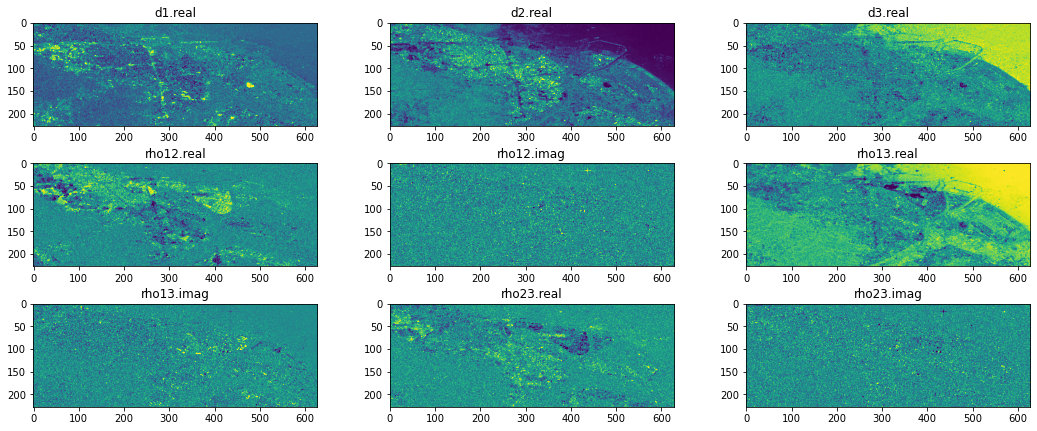

In [16]:
print (f"TRAIN IMAGE {date_train}")
for ax,i in subplots(range(9), n_cols=3, usizex=5, usizey=2):
    x = ncm_train[:,:,i]
    vmin, vmax = np.percentile(x, [1,99])
    plt.imshow(x.T, vmin=vmin, vmax=vmax)
    plt.title(names[i])

### test image

TEST IMAGE 20120720


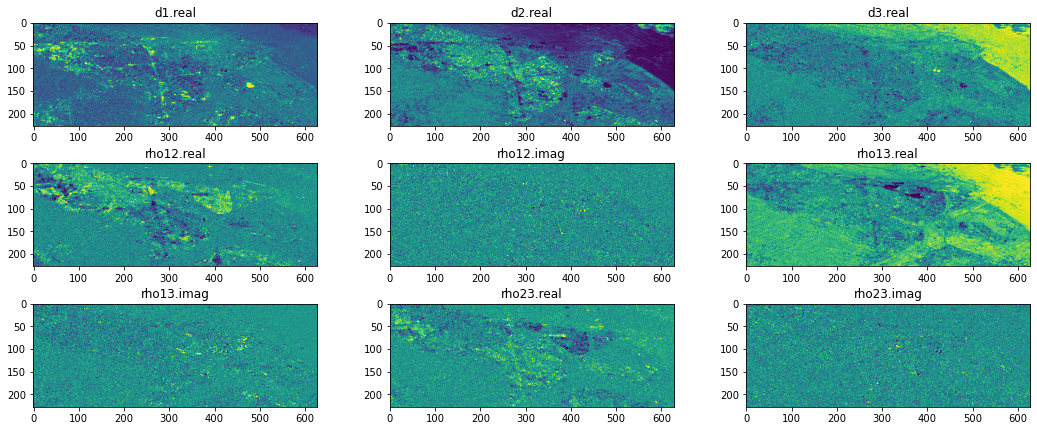

In [17]:
print (f"TEST IMAGE {date_test2}")
for ax,i in subplots(range(9), n_cols=3, usizex=5, usizey=2):
    x = ncm_test2[:,:,i]
    vmin, vmax = np.percentile(x, [1,99])
    plt.imshow(x.T, vmin=vmin, vmax=vmax)
    plt.title(names[i])

correllations between train 20100520 vs test1 20101222


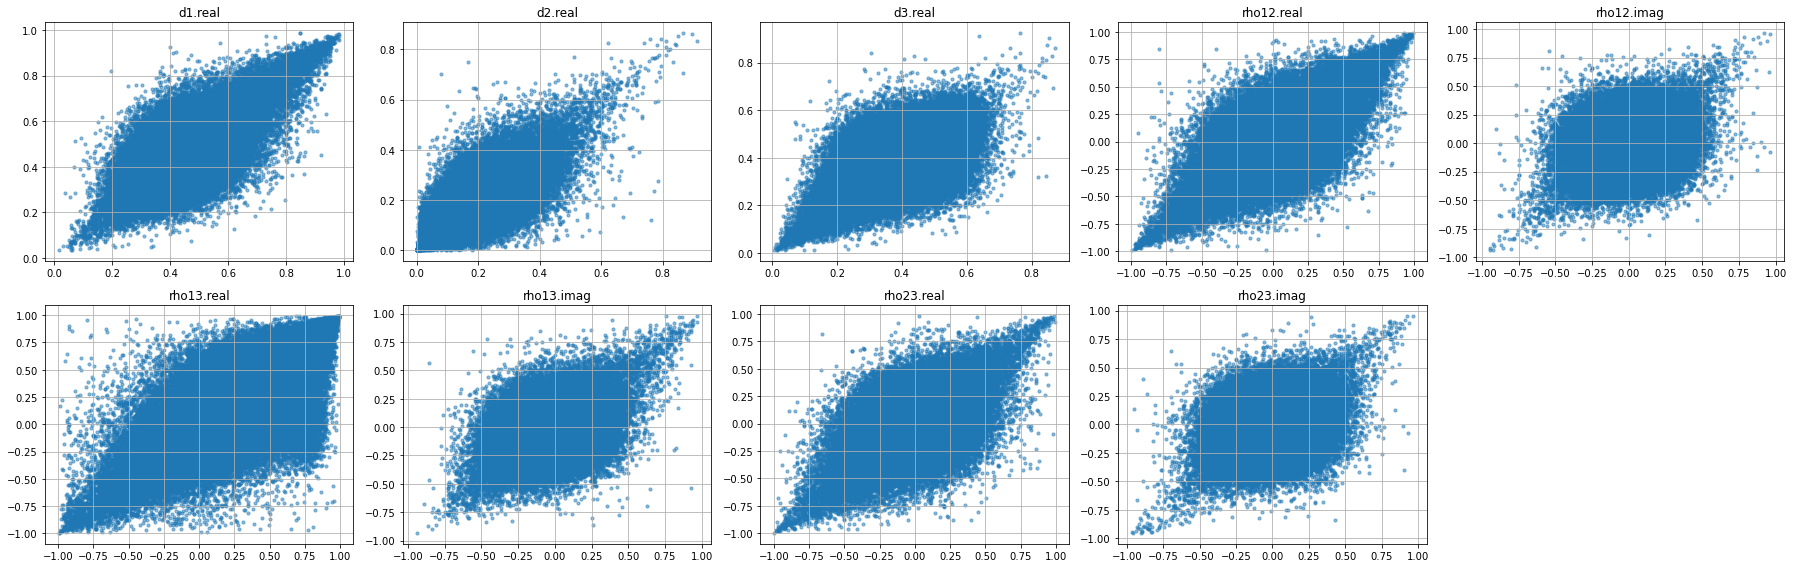

In [18]:
print (f"correllations between train {date_train} vs test1 {date_test1}")
for ax,i in subplots(9, n_cols=5, usizex=5, usizey=4):
    plt.scatter(ncm_train[..., i], ncm_test1[..., i], s=10, alpha=.5)
    plt.title(f"{names[i]}")
    plt.grid();

correllations between train 20100520 vs test2 20120720


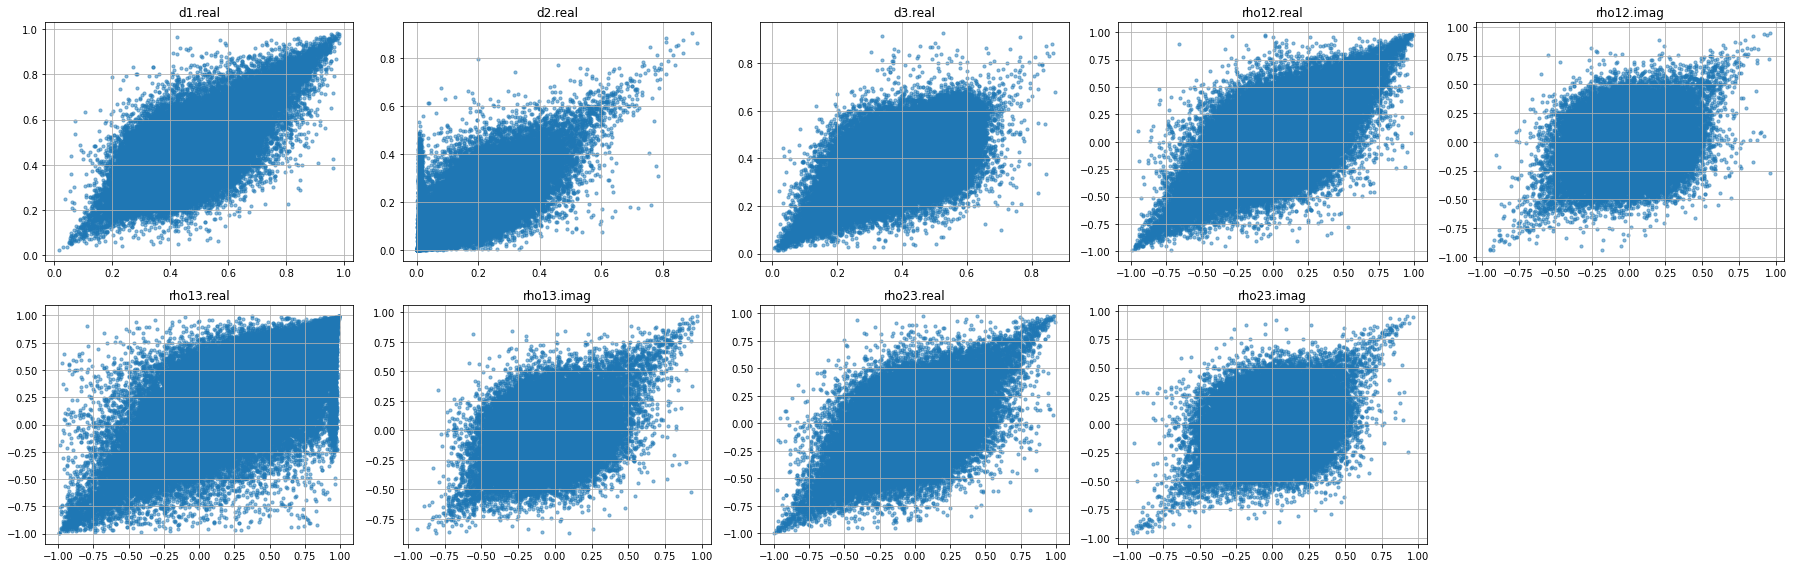

In [19]:
print (f"correllations between train {date_train} vs test2 {date_test2}")
for ax,i in subplots(9, n_cols=5, usizex=5, usizey=4):
    plt.scatter(ncm_train[..., i], ncm_test2[..., i], s=10, alpha=.5)
    plt.title(f"{names[i]}")
    plt.grid();